In [1]:
import sys
import SimpleITK as sitk
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline 
import numpy as np
import os
import fnmatch
import shutil
from ipywidgets import interact, fixed
import pandas as pd
import warnings
from skimage import exposure
from skimage import data
from skimage.transform import rotate
import _pickle as cPickle
import random


def myshow(image_arr,slice_n):
    plt.imshow(image_arr[slice_n,:,:],cmap='gray')
    plt.show()

In [2]:
#Read Pickle files

t2_df = pd.read_pickle('./t2_df_32.pkl')
adc_df = pd.read_pickle('./adc_df_32.pkl')
bval_df = pd.read_pickle('./bval_df_32.pkl')
ktrans_df = pd.read_pickle('./ktrans_df_32.pkl')



In [3]:

t2_df.name = 't2 modality'
adc_df.name = 'adc modality'
bval_df.name = 'bval modality'
ktrans_df.name = 'ktrans modality'

### Soft EDA before augmentation 

In [4]:
#Starting Rotations 
#we have 81 Cancer Cases for t2 Modality 
#68 for adc and 68 for bval 
#and 73 for the ktrans modality 

def describe_df(data, column, what_describe = ''):
    
    print('{} for {}\n'.format(what_describe, data.name))
    print(data.loc[:,column].value_counts(), '\n\n\n')
    

frames = [t2_df, adc_df, bval_df, ktrans_df]


#describe biopsy findings 

for i in frames:
    describe_df(i, 'ClinSig', 'Cancer or Not')

Cancer or Not for t2 modality

False    266
True      81
Name: ClinSig, dtype: int64 



Cancer or Not for adc modality

False    247
True      68
Name: ClinSig, dtype: int64 



Cancer or Not for bval modality

False    249
True      68
Name: ClinSig, dtype: int64 



Cancer or Not for ktrans modality

False    253
True      73
Name: ClinSig, dtype: int64 





### Data Augmentation by rotation (45, 90, 180, 270) degrees

In [5]:
#we need to rotate images with cancer biopsy findings to balance our data and to reduce overfitting 

def rotate_cancers(data,rotate_degree,columns = ['ClinSig', 'patches']):
    
    new_dict ={}
    #new_dict['patches'] = np.ndarray([])
    
    for i in range(len(data.patches)):
       
        try:
            if data.loc[i, 'ClinSig']==True:
                
                image = data.loc[i,'patches']
                 
                new_dict[i]=rotate(image , rotate_degree)
                
            else:
                
                continue 
        except:
            KeyError
    return new_dict



#applying rotate_cancers function 

rotate_45_t2 = rotate_cancers(t2_df, 45)
rotate_90_t2 = rotate_cancers(t2_df, 90)
rotate_180_t2 = rotate_cancers(t2_df, 180)
rotate_270_t2 = rotate_cancers(t2_df, 270)

rotate_45_adc = rotate_cancers(adc_df, 45)
rotate_90_adc = rotate_cancers(adc_df, 90)
rotate_180_adc = rotate_cancers(adc_df, 180)
rotate_270_adc = rotate_cancers(adc_df, 270)

rotate_45_bval = rotate_cancers(bval_df, 45)
rotate_90_bval = rotate_cancers(bval_df, 90)
rotate_180_bval = rotate_cancers(bval_df, 180)
rotate_270_bval = rotate_cancers(bval_df, 270)

rotate_45_ktrans = rotate_cancers(ktrans_df, 45)
rotate_90_ktrans = rotate_cancers(ktrans_df, 90)
rotate_180_ktrans = rotate_cancers(ktrans_df, 180)
rotate_270_ktrans = rotate_cancers(ktrans_df, 270)

In [6]:
#function which aimed to apply all of rotated images
def add_rotate(df, dict_rotate, column_name):
    df[column_name] = ''
    for key in dict_rotate:
        if df.index[key]==key:
            df.at[key, column_name]=dict_rotate[key]
            
    print('{} Done!'.format(df.name))


In [7]:
names = ['rotate_45', 'rotate_90', 'rotate_180', 'rotate_270']

add_rotate(t2_df, rotate_45_t2, names[0])
add_rotate(t2_df, rotate_90_t2, names[1])
add_rotate(t2_df, rotate_180_t2, names[2])
add_rotate(t2_df, rotate_270_t2, names[3])

add_rotate(adc_df, rotate_45_adc, names[0])
add_rotate(adc_df, rotate_90_adc, names[1])
add_rotate(adc_df, rotate_180_adc, names[2])
add_rotate(adc_df, rotate_270_adc, names[3])

add_rotate(bval_df, rotate_45_bval, names[0])
add_rotate(bval_df, rotate_90_bval, names[1])
add_rotate(bval_df, rotate_180_bval, names[2])
add_rotate(bval_df, rotate_270_bval, names[3])

add_rotate(ktrans_df, rotate_45_ktrans, names[0])
add_rotate(ktrans_df, rotate_90_ktrans, names[1])
add_rotate(ktrans_df, rotate_180_ktrans, names[2])
add_rotate(ktrans_df, rotate_270_ktrans, names[3])

PZ
PZ
PZ
PZ
AS
AS
PZ
PZ
TZ
PZ
PZ
AS
AS
PZ
PZ
PZ
AS
AS
PZ
AS
PZ
PZ
AS
AS
AS
TZ
PZ
AS
AS
PZ
TZ
TZ
PZ
AS
TZ
AS
AS
TZ
TZ
PZ
AS
PZ
PZ
PZ
PZ
PZ
PZ
AS
PZ
PZ
PZ
AS
PZ
AS
AS
AS
TZ
PZ
PZ
AS
AS
PZ
PZ
AS
AS
PZ
PZ
PZ
TZ
PZ
PZ
PZ
PZ
TZ
TZ
AS
AS
AS
AS
AS
PZ
t2 modality Done!
PZ
PZ
PZ
PZ
AS
AS
PZ
PZ
TZ
PZ
PZ
AS
AS
PZ
PZ
PZ
AS
AS
PZ
AS
PZ
PZ
AS
AS
AS
TZ
PZ
AS
AS
PZ
TZ
TZ
PZ
AS
TZ
AS
AS
TZ
TZ
PZ
AS
PZ
PZ
PZ
PZ
PZ
PZ
AS
PZ
PZ
PZ
AS
PZ
AS
AS
AS
TZ
PZ
PZ
AS
AS
PZ
PZ
AS
AS
PZ
PZ
PZ
TZ
PZ
PZ
PZ
PZ
TZ
TZ
AS
AS
AS
AS
AS
PZ
t2 modality Done!
PZ
PZ
PZ
PZ
AS
AS
PZ
PZ
TZ
PZ
PZ
AS
AS
PZ
PZ
PZ
AS
AS
PZ
AS
PZ
PZ
AS
AS
AS
TZ
PZ
AS
AS
PZ
TZ
TZ
PZ
AS
TZ
AS
AS
TZ
TZ
PZ
AS
PZ
PZ
PZ
PZ
PZ
PZ
AS
PZ
PZ
PZ
AS
PZ
AS
AS
AS
TZ
PZ
PZ
AS
AS
PZ
PZ
AS
AS
PZ
PZ
PZ
TZ
PZ
PZ
PZ
PZ
TZ
TZ
AS
AS
AS
AS
AS
PZ
t2 modality Done!
PZ
PZ
PZ
PZ
AS
AS
PZ
PZ
TZ
PZ
PZ
AS
AS
PZ
PZ
PZ
AS
AS
PZ
AS
PZ
PZ
AS
AS
AS
TZ
PZ
AS
AS
PZ
TZ
TZ
PZ
AS
TZ
AS
AS
TZ
TZ
PZ
AS
PZ
PZ
PZ
PZ
PZ
PZ
AS
PZ
PZ
PZ
AS
PZ
AS
AS
AS
TZ
PZ
PZ
AS
AS
PZ
PZ
AS
AS
PZ
PZ
PZ
TZ
PZ
PZ
PZ
P

In [8]:
def redo_dataframe(data, rotate_to_leave, new_names_of_colums=['ClinSig', 'patches', 'zone']): 
    data=data[['ClinSig',rotate_to_leave, 'zone']].loc[data.ClinSig==True]
    data.columns=new_names_of_colums
    return data

In [9]:
columns=['rotate_45', 'rotate_90', 'rotate_180', 'rotate_270']


#t2 dataframes to join
r_45_df_t2=redo_dataframe(t2_df, columns[0])
r_90_df_t2=redo_dataframe(t2_df, columns[1])
r_180_df_t2=redo_dataframe(t2_df, columns[2])
r_270_df_t2=redo_dataframe(t2_df, columns[3])
t2_df=t2_df.loc[:,['ClinSig', 'patches', 'zone']]

#adc dataframes to join 
r_45_df_adc=redo_dataframe(adc_df, columns[0])
r_90_df_adc=redo_dataframe(adc_df, columns[1])
r_180_df_adc=redo_dataframe(adc_df, columns[2])
r_270_df_adc=redo_dataframe(adc_df, columns[3])
adc_df=adc_df.loc[:,['ClinSig', 'patches', 'zone']]  

#bval dataframes to join 
r_45_df_bval=redo_dataframe(bval_df, columns[0])
r_90_df_bval=redo_dataframe(bval_df, columns[1])
r_180_df_bval=redo_dataframe(bval_df, columns[2])
r_270_df_bval=redo_dataframe(bval_df, columns[3])
bval_df=bval_df.loc[:,['ClinSig', 'patches', 'zone']]

#ktrans dataframes to join 
r_45_df_ktrans=redo_dataframe(ktrans_df, columns[0])
r_90_df_bval=redo_dataframe(ktrans_df, columns[1])
r_180_df_bval=redo_dataframe(ktrans_df, columns[2])
r_270_df_bval=redo_dataframe(ktrans_df, columns[3])
ktrans_df=ktrans_df.loc[:,['ClinSig', 'patches', 'zone']]  

In [10]:
#t2 final dataframe
t2_frames=[t2_df, r_45_df_t2, r_90_df_t2, r_180_df_t2, r_270_df_t2]
t2_final=pd.concat(t2_frames).copy()
t2_final.index=range(len(t2_final))

#adc final dataframe
adc_frames=[adc_df, r_45_df_adc, r_90_df_adc, r_180_df_adc, r_270_df_adc]
adc_final=pd.concat(adc_frames).copy()
adc_final.index=range(len(adc_final))

#bval final dataframes
bval_frames=[bval_df, r_45_df_bval, r_90_df_bval, r_180_df_bval, r_270_df_bval]
bval_final=pd.concat(bval_frames).copy()
bval_final.index=range(len(bval_final))

#ktrans final dataframes
ktrans_frames=[ktrans_df, r_45_df_ktrans, r_90_df_bval, r_180_df_bval, r_270_df_bval]
ktrans_final=pd.concat(ktrans_frames).copy()
ktrans_final.index=range(len(ktrans_final))



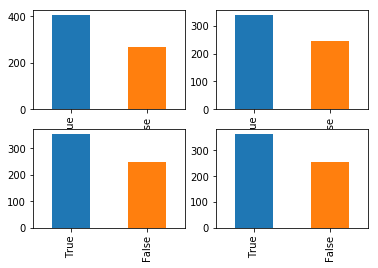

In [11]:
#Little EDA to check ratios between Cancer/No-cancer images after data augmentations 
plt.figure(1)

plt.subplot(2,2,1)
t2_final.ClinSig.value_counts().plot(kind='bar')

plt.subplot(2,2,2)
adc_final.ClinSig.value_counts().plot(kind='bar', ax=plt.gca())

plt.subplot(2,2,3)
bval_final.ClinSig.value_counts().plot(kind='bar', ax=plt.gca())

plt.subplot(2,2,4)
ktrans_final.ClinSig.value_counts().plot(kind='bar', ax=plt.gca())



In [12]:
frames_final = [t2_final, adc_final, bval_final, ktrans_final]
t2_final.name='t2'
adc_final.name='adc'
bval_final.name='bval'
ktrans_final.name='ktrans'

#describe biopsy findings 

for i in frames_final:
    describe_df(i, 'ClinSig', 'Cancer or Not')

Cancer or Not for t2

True     405
False    266
Name: ClinSig, dtype: int64 



Cancer or Not for adc

True     340
False    247
Name: ClinSig, dtype: int64 



Cancer or Not for bval

True     355
False    249
Name: ClinSig, dtype: int64 



Cancer or Not for ktrans

True     365
False    253
Name: ClinSig, dtype: int64 





,ClinSig,patches,zone
0,True,"[[0.5803865131578947, 0.5536948756167763, 0.62...",PZ
1,False,"[[0.21499758714820907, 0.24472563448008042, 0....",AS
2,False,"[[0.3946990074470029, 0.36620594046966376, 0.3...",AS
3,False,"[[0.6000276978252924, 0.49829458493238304, 0.4...",PZ
4,True,"[[0.5390471519782529, 0.5536930909630848, 0.56...",PZ
5,False,"[[0.5575164310515873, 0.4942869156125992, 0.53...",TZ
6,False,"[[0.43511704540757273, 0.44143079323743384, 0....",TZ
7,False,"[[0.7168971971533764, 0.6864626361949234, 0.62...",AS
8,False,"[[0.4681414330911915, 0.4795867741456506, 0.53...",TZ
9,True,"[[0.24221212822094298, 0.09908004671509503, 0....",PZ


In [15]:
#once we get adequately balanced datasets we can right them top the disk for further analysis




t2_final.to_pickle('./t2_augmented.pkl')
adc_final.to_pickle('./adc_augmented.pkl')
bval_final.to_pickle('./bval_augmented.pkl')
ktrans_final.to_pickle('./ktrans_augmented.pkl')

In [ ]:
'''
As we see from the above visualizations, there is imbalance in the contrary way right now
We can add needed number of rotated for 45 degrees noncancers samples
It is better to add them as it will be a lot of zero values around picture in 45 degrees rotated image among cancer samples
And these zero values could be treated as a feature by our model, that is why I decided to add rotated for 45 degrees non-cancer images
'''
"""
def rotate_nocancers(data, degree=45, sam=100):
    
    dict_rotated = {}
    dict_zone = {} 
    a=random.sample(list(data.loc[data.ClinSig==False].index), sam) #sam=number of needed samples; first part are indexes for random choice among them
    
    for i in a:
        image=data.loc[i,'patches']
        image_rotated=rotate(image, degree)
        dict_rotated[i]=image_rotated
        dict_zone[i] = data.loc[i, 'zone']
    df=pd.DataFrame(pd.Series(dict_rotated), pd.Series(dict_zone))
    df['ClinSig']=False
    df['zone']=dict_zone
    df.columns=['patches', 'ClinSig', 'zone']
    df=df.loc[:, ['ClinSig', 'patches', 'zone']]
    return df

#applying and getting dataframes
t2_noc=rotate_nocancers(t2_final, sam=81)
adc_noc=rotate_nocancers(adc_final, sam=68)
bval_noc=rotate_nocancers(bval_final, sam=68)
ktrans_noc=rotate_nocancers(ktrans_final, sam=73)

#adding received dataframes to the existing final data_frames
#t2
t2_frames=[t2_final, t2_noc]
t2_f=pd.concat(t2_frames).copy()
t2_f.index=range(len(t2_f))
#adc
adc_frames=[adc_final, adc_noc]
adc_f=pd.concat(adc_frames).copy()
adc_f.index=range(len(adc_f))
#bval
bval_frames=[bval_final, bval_noc]
bval_f=pd.concat(bval_frames).copy()
bval_f.index=range(len(bval_f))
#ktrans
ktrans_frames=[ktrans_final, ktrans_noc]
ktrans_f=pd.concat(ktrans_frames).copy()
ktrans_f.index=range(len(ktrans_f))



#Figures after additional augmentation 

plt.figure(1)

plt.subplot(2,2,1)
t2_f.ClinSig.value_counts().plot(kind='bar')

plt.subplot(2,2,2)
adc_f.ClinSig.value_counts().plot(kind='bar', ax=plt.gca())

plt.subplot(2,2,3)
bval_f.ClinSig.value_counts().plot(kind='bar', ax=plt.gca())

plt.subplot(2,2,4)
ktrans_f.ClinSig.value_counts().plot(kind='bar', ax=plt.gca())
"""